In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets  import load_iris
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
x=pd.DataFrame(df.iloc[: ,[5,6,7]].values)
x.columns=['math_score','reading_score','writing_score']
x

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [4]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_raceethnicity = LabelEncoder()
le_parentallevelofeducation= LabelEncoder()
le_lunch= LabelEncoder()
le_testpreparationcourse= LabelEncoder()

In [5]:
df['gender_n'] = le_gender.fit_transform(df['gender'])
df['raceethnicity_n'] = le_raceethnicity.fit_transform(df['race/ethnicity'])
df['parentallevelofeducation_n'] = le_parentallevelofeducation.fit_transform(df['parental level of education'])
df['lunch_n'] = le_lunch.fit_transform(df['lunch'])
df['testpreparationcourse_n'] = le_testpreparationcourse.fit_transform(df['test preparation course'])
gd=df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis='columns')
gd

,math score,reading score,writing score,gender_n,raceethnicity_n,parentallevelofeducation_n,lunch_n,testpreparationcourse_n
0,72,72,74,0,1,1,1,1
1,69,90,88,0,2,4,1,0
2,90,95,93,0,1,3,1,1
3,47,57,44,1,0,0,0,1
4,76,78,75,1,2,4,1,1
...,...,...,...,...,...,...,...,...
995,88,99,95,0,4,3,1,0
996,62,55,55,1,2,2,0,1
997,59,71,65,0,2,2,0,0
998,68,78,77,0,3,4,1,0


##  K Means Clustering ##

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
sse

[673318.602,
 281951.8965908354,
 177501.5388480823,
 136363.80165653012,
 111307.99410631621,
 97434.81413491063,
 85713.72828521575,
 76646.69101086824,
 68503.66510283062]

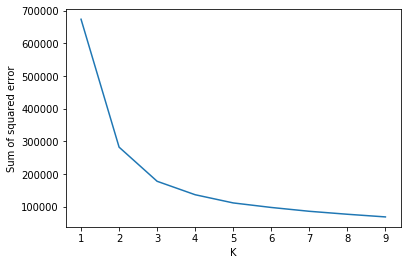

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[2 0 0 1 0 0 0 1 2 1 1 1 2 2 1 2 0 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 0 0 0
 1 0 1 1 2 2 2 1 2 2 2 2 0 1 2 1 0 0 1 0 1 2 1 2 1 2 2 2 2 1 2 2 1 2 2 1 1
 1 1 1 0 2 2 1 1 1 2 1 0 0 2 2 0 2 1 2 1 0 0 2 2 2 2 2 2 0 1 0 2 0 2 2 2 0
 1 1 1 0 0 0 0 2 2 0 0 0 2 0 0 2 2 0 1 0 1 0 0 0 1 1 2 2 2 2 2 1 1 0 1 0 2
 2 0 2 2 2 1 2 0 2 2 0 2 0 0 1 1 0 0 1 2 0 2 2 0 0 2 1 0 1 2 2 0 2 2 1 2 1
 2 2 2 1 0 2 0 2 2 0 1 2 1 1 0 0 2 2 2 1 2 2 0 0 2 0 1 1 1 0 0 0 1 2 1 2 0
 2 0 2 1 2 1 2 0 2 1 0 0 0 0 2 2 1 0 2 0 1 1 2 0 0 2 2 2 1 0 2 0 1 2 2 0 2
 0 2 0 1 0 2 1 2 2 0 2 2 1 1 2 0 0 0 2 0 2 1 1 0 0 1 0 0 0 0 0 2 0 2 2 0 2
 1 2 1 0 0 1 0 2 0 2 0 1 2 1 0 2 2 2 2 2 0 0 2 2 0 0 0 1 1 0 2 1 0 1 2 1 1
 0 0 2 2 1 1 1 1 2 2 2 2 0 2 0 2 0 2 2 2 1 2 2 2 2 2 0 2 0 1 1 2 1 2 2 1 0
 0 2 2 0 2 1 0 0 0 2 0 0 0 1 1 2 2 2 2 2 2 2 2 1 2 1 2 0 2 1 2 1 1 0 2 2 2
 0 1 0 2 0 2 2 2 0 2 2 2 1 0 2 1 2 1 2 0 2 2 2 2 2 1 1 2 1 2 2 2 0 0 0 2 0
 0 2 2 0 1 0 0 0 2 1 2 1 0 1 0 2 1 1 2 0 2 0 1 2 0 0 0 2 0 2 0 0 2 2 2 2 2
 1 2 1 1 2 1 2 1 0 0 2 0 

In [9]:
kmeans3.cluster_centers_

array([[81.66134185, 84.98083067, 84.02555911],
       [47.94331984, 50.63157895, 48.4534413 ],
       [65.19772727, 68.32727273, 67.69545455]])

Text(0.5, 1.0, 'Writing score VS Reading score')

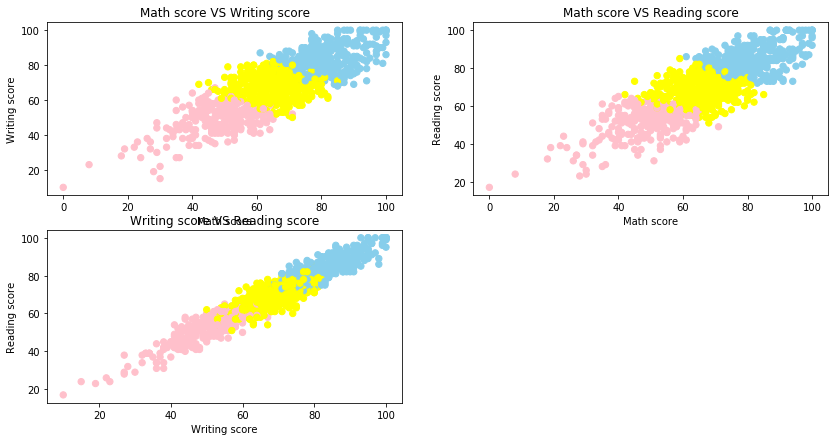

In [10]:
colormap=np.array(['skyblue','pink','yellow'])
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.scatter(x.math_score,x.writing_score,c=colormap[y_kmeans3],s=40)
plt.xlabel('Math score')
plt.ylabel('Writing score')
plt.title('Math score VS Writing score')
plt.subplot(2,2,2)
plt.scatter(x.math_score,x.reading_score,c=colormap[y_kmeans3],s=40)
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.title('Math score VS Reading score')
plt.subplot(2,2,3)
plt.scatter(x.writing_score,x.reading_score,c=colormap[y_kmeans3],s=40)
plt.xlabel('Writing score')
plt.ylabel('Reading score')
plt.title('Writing score VS Reading score')

## Hierarchial Clustering ##

In [11]:
import scipy.cluster.hierarchy as sch
xe=np.array(x)
xe

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

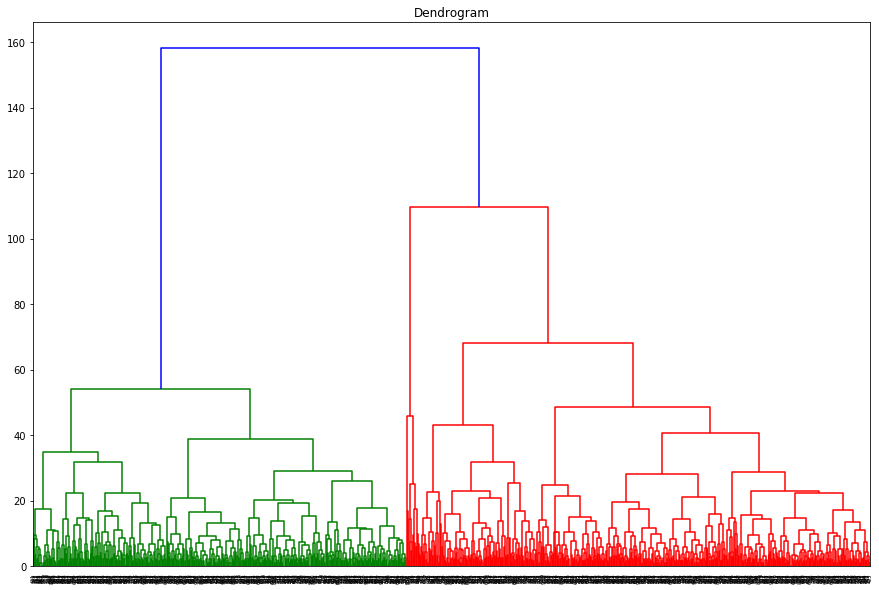

In [12]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(xe, method  = "complete"))
plt.title('Dendrogram')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')

In [14]:
y_hc=hc.fit_predict(xe)

In [15]:
y_hc

array([3, 4, 4, 1, 3, 3, 4, 1, 2, 5, 1, 1, 3, 3, 1, 3, 4, 0, 1, 5, 2, 3,
       5, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 1, 4, 3, 3, 5, 4, 2, 5, 2, 2, 2,
       5, 2, 2, 2, 2, 3, 1, 2, 1, 3, 3, 1, 4, 1, 2, 0, 3, 1, 2, 3, 2, 2,
       1, 2, 2, 5, 2, 2, 1, 2, 1, 1, 0, 3, 2, 2, 1, 1, 1, 2, 1, 3, 4, 3,
       2, 3, 2, 0, 3, 1, 4, 3, 2, 2, 2, 2, 2, 3, 4, 1, 4, 2, 4, 2, 2, 2,
       4, 2, 1, 5, 4, 3, 3, 3, 5, 2, 4, 4, 4, 2, 3, 4, 2, 3, 3, 1, 4, 1,
       3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 5, 1, 3, 0, 4, 2, 3, 4, 2, 2, 2, 1,
       2, 4, 3, 2, 3, 2, 3, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 4, 4, 2, 5, 4,
       5, 3, 2, 4, 2, 5, 1, 2, 1, 2, 3, 2, 1, 4, 2, 3, 2, 2, 3, 2, 2, 1,
       5, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 0, 5, 1, 4, 3, 4, 1, 3, 2,
       2, 4, 2, 3, 2, 5, 3, 1, 2, 4, 2, 1, 3, 4, 3, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 4,
       3, 1, 3, 3, 4, 3, 2, 1, 5, 2, 4, 3, 4, 2, 3, 2, 1, 1, 3, 3, 1, 3,
       4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 1, 4, 3,

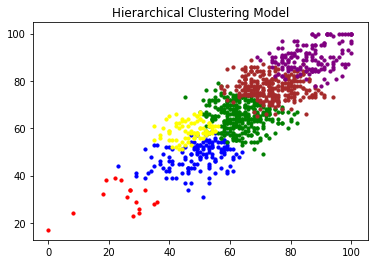

In [16]:
plt.scatter(xe[y_hc==0, 0], xe[y_hc==0, 1], s=10, c='red', label ='Cluster 1') 
plt.scatter(xe[y_hc==1, 0], xe[y_hc==1, 1], s=10, c='blue', label ='Cluster 2') 
plt.scatter(xe[y_hc==2, 0], xe[y_hc==2, 1],s=10, c='green', label ='Cluster 3')
plt.scatter(xe[y_hc==3, 0], xe[y_hc==3, 1],s=10, c='brown', label ='Cluster 4')
plt.scatter(xe[y_hc==4, 0], xe[y_hc==4, 1],s=10, c='purple', label ='Cluster 5')
plt.scatter(xe[y_hc==5, 0], xe[y_hc==5, 1],s=10, c='yellow', label ='Cluster 6')
plt.title('Hierarchical Clustering Model')
plt.show()

## DBSCAN ##

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, metric='euclidean', min_samples=5)

In [18]:
dbscan.fit(x)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [19]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        3, -1, -1, -1, -1,  7, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [20]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [22]:
import matplotlib.pyplot as pl
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x) 
pca_2d = pca.transform(x)
pca_2d

array([[ -8.48837536,   1.26411978],
       [-25.46144129, -13.73117695],
       [-43.12175323,  -0.35950596],
       ...,
       [  4.75467372,  -5.15605377],
       [-11.46651782,  -5.47790938],
       [-26.47680822,  -4.83322812]])

In [23]:
list(dbscan.labels_).count(8)

5

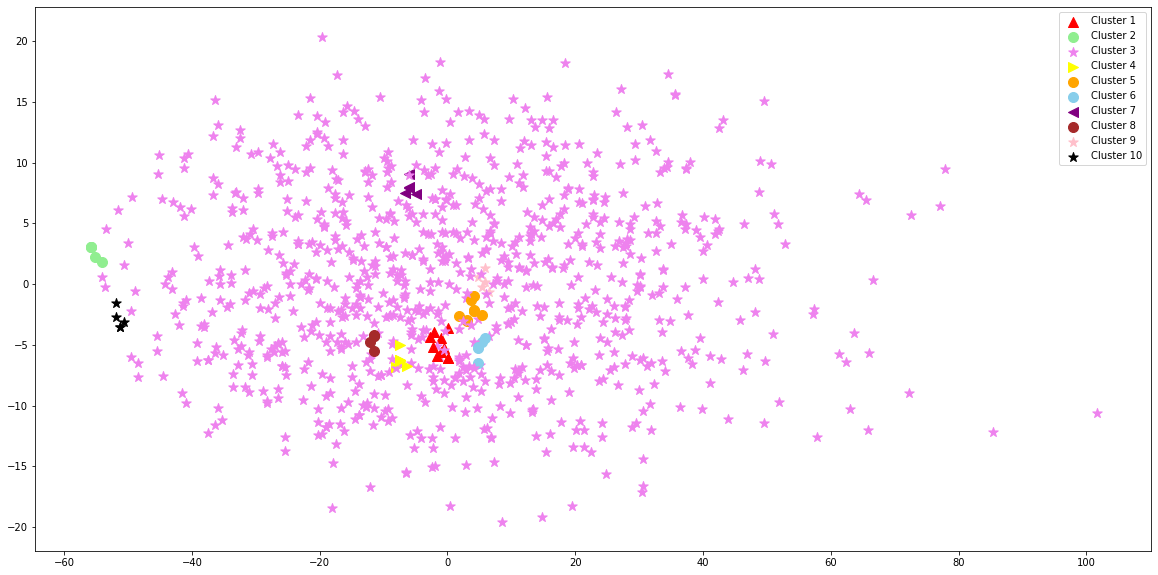

In [24]:
pl.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='lightgreen', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='violet',marker='*')
    elif dbscan.labels_[i] == 2:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='yellow',marker='>')
    elif dbscan.labels_[i] == 3:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='orange',marker='o')
    elif dbscan.labels_[i] == 4:
        c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='skyblue',marker='o')
    elif dbscan.labels_[i] == 5:
        c7 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='purple',marker='<')
    elif dbscan.labels_[i] == 6:
        c8 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='brown',marker='o')
    elif dbscan.labels_[i] == 7:
        c9 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='pink',marker='*')
    elif dbscan.labels_[i] == 8:
        c10 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='black',marker='*')
pl.legend([c1, c2, c3,c4,c5,c6,c7,c8,c9,c10], ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10'])

## Plotting of Graphs ##

In [25]:
f=(gd['gender_n'])
cd=f.value_counts().to_dict()
cd

{0: 518, 1: 482}

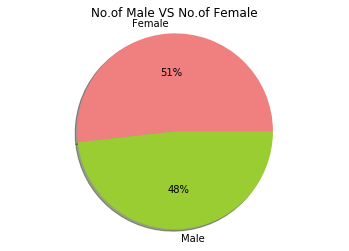

In [26]:
labels=['Female','Male']
sizes=[cd[0],cd[1]]
colors=['lightcoral','yellowgreen']
explode=(0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1d%%',shadow=True)
plt.axis('equal')
plt.title('No.of Male VS No.of Female')
plt.show()

In [27]:
df['race/ethnicity']

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object

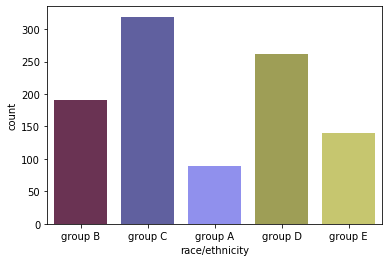

In [29]:
sns.countplot('race/ethnicity',data=df,palette='gist_stern')